In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sympy import * 
from tensorflow import keras 

In [2]:
# Prediction from Univariate Sequential Data ( only feature is Time )

seq = [ 10 , 30 , 50 , 70 , 90 , 110 , 130 ]

seq1  = np.array(seq)

seq = (seq - seq1.mean() )/ seq1.std()

# Decide time step( at a time , len of inp se to LSTM e,g no of words in sentence )
t_steps = 3 
n_features = 1  # (Univariate , endogenous , static )

# MAke training data from given raw (unprocessed) seq 

def inp_seq( seq , t_steps ):
    X= [] 
    Y= []
    for i in range( len(seq) ):
        end_i = i + t_steps 

        if( end_i > len(seq)-1) :
            break
        # take from i to t_steps as X and just after as target var 
        x, y = seq[i:end_i] , seq[end_i]
        X.append(x)
        Y.append(y)
    return np.array(X) , np.array(Y) 

X, y = inp_seq ( seq , t_steps )

# actual INP to LSTM or RNN or GRU are ( no of samples total ( no of rows ),t_steps (no. of cols ), inp_features )
X = X.reshape ( ( X.shape[0] , X.shape[1] ,1  ) ) 


# Now ,a t 1 instant , we pass 1 seq of info .( ie 1 instance of size =3 ) [10 , 20 , 30] and trian the lSTM on it with y = 40 



In [3]:
# Harness the Model 
# units in LSTM - dim of output neurons / dim  of ht (hidden state) /cell stae*ct - LTM )

ts_model = keras.models.Sequential([

   # 1 hidden layer of LSTM   with out dim of ht as = 50 units 
   # USe relu actiavtion snce tanh already sued in LSTM to detemine LTM and STM and  input_shape== (t_steps , no of features )
   keras.layers.LSTM( 50 , activation = "relu" ,  input_shape= (t_steps , n_features ) ) ,

   # FOr final prdictin and processing , use a FUlly CONECTED LAYER ( FCN )
   keras.layers.Dense(1 ) # regression , ONLY 1 output neuron ( with no act ivation )

])

ts_model.compile (loss = "mse" , optimizer = "sgd" , metrics = "mse")


In [4]:
# keep epichs higher wile trianing the LSTM 
history = ts_model.fit( X , y , epochs = 100) 

# sgd is becoming non differntible (part_dev(Loss) / part_dev(w) == 0)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8793 - mse: 0.8793
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8523 - mse: 0.8523
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8261 - mse: 0.8261
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8007 - mse: 0.8007
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7764 - mse: 0.7764
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7532 - mse: 0.7532
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7310 - mse: 0.7310
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7099 - mse: 0.7099
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6897 - mse: 0.6897
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6704 - mse: 0.6704
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0

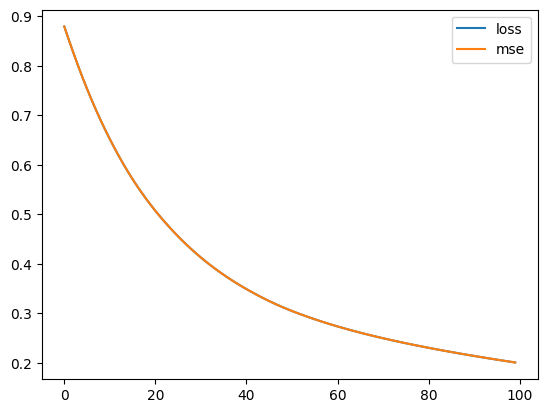

In [5]:
pd.DataFrame( history.history).plot()
plt.show()

In [6]:
# New smaple data for prediction 


''' If MSE > INT_MAX , use Scaling to transform the data '''
X1 = np.array([ 90 , 110 , 130 ])
mu = X1.mean() 
std_ = X1.std()

X1 = ( X1 - mu ) /  std_
X1 = X1.reshape( (1 , 3 , 1 ) )
X1

num = ts_model.predict(X1 ) 
num = num*std_ + mu 
num

1/1 [==============================] - 0s 289ms/step


array([[122.77788]], dtype=float32)

In [7]:
''' Stacked LSTM for TS Prediction - keep return sequence s hyperparam =True for all layers except alst one since 
by default , LSTM takes 3D input but output is NOT 3D , and in stacked LSTM ( LSTM over one another) , the putput of prev LSTM= 3D
so return_seq = True (except Last layrr ) and alway suse a Dense layer for further trianing and final prediction '''

# Harness the Model 
# units in LSTM - dim of output neurons / dim  of ht (hidden state) /cell stae*ct - LTM )

ts_model1 = keras.models.Sequential([

   # 1 hidden layer of LSTM   with out dim of ht as = 50 units 
   # USe relu actiavtion snce tanh already sued in LSTM to detemine LTM and STM and  input_shape== (t_steps , no of features )

   # Hidden LAyer 1 of LSTM 
   keras.layers.LSTM( 50 , activation = "relu" ,  input_shape= (t_steps , n_features )  , return_sequences = True ) ,

   # Hidden Layer 2 of LSTM 
   keras.layers.LSTM( 50 , activation = "relu" ) ,

   # FOr final prdictin and processing , use a FUlly CONECTED LAYER ( FCN )
   keras.layers.Dense(1 ) # regression , ONLY 1 output neuron ( with no act ivation )

])

ts_model1.compile (loss = "mse" , optimizer = "sgd" , metrics = "mse")


In [8]:
history = ts_model1.fit(X , y , epochs =100  )

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8766 - mse: 0.8766
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8496 - mse: 0.8496
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8235 - mse: 0.8235
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7989 - mse: 0.7989
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7757 - mse: 0.7757
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7536 - mse: 0.7536
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7324 - mse: 0.7324
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7123 - mse: 0.7123
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - mse: 0.6932
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6749 - mse: 0.6749
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss

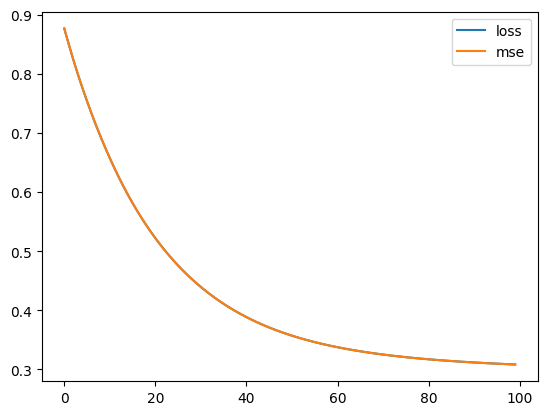

In [9]:
pd.DataFrame( history.history).plot()
plt.show()

In [10]:
# New smaple data for prediction 


''' If MSE > INT_MAX , use Scaling to transform the data '''
X1 = np.array([ 90 , 110 , 130 ])
mu = X1.mean() 
std_ = X1.std()

X1 = ( X1 - mu ) /  std_
X1 = X1.reshape( (1 , 3 , 1 ) )
X1

num = ts_model1.predict(X1 ) 
num = num*std_ + mu 
num

1/1 [==============================] - 0s 379ms/step


array([[121.27008]], dtype=float32)

In [11]:
'''  USing Bidirectional LSTM , mmking the LSTM learn i n both dir from sequential data 
Wrap the LSTM hidden layer in Bidirectional()
'''



# Harness the Model 
# units in LSTM - dim of output neurons / dim  of ht (hidden state) /cell stae*ct - LTM )

ts_model_bir = keras.models.Sequential([

   # 1 hidden layer of LSTM   with out dim of ht as = 50 units 
   # USe relu actiavtion snce tanh already sued in LSTM to detemine LTM and STM and  input_shape== (t_steps , no of features )

   # Hidden LAyer 1 of LSTM 
   keras.layers.Bidirectional( keras.layers.LSTM( 50 , activation = "relu" ,  input_shape= (t_steps , n_features )   )) ,

   

   # FOr final prdictin and processing , use a FUlly CONECTED LAYER ( FCN )
   keras.layers.Dense(1 ) # regression , ONLY 1 output neuron ( with no act ivation )

])

ts_model_bir.compile (loss = "mse" , optimizer = "adam" , metrics = "mse")


In [12]:
history = ts_model_bir.fit(X , y , epochs =100  )

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.8322 - mse: 0.8322
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8188 - mse: 0.8188
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8057 - mse: 0.8057
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7927 - mse: 0.7927
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7796 - mse: 0.7796
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7666 - mse: 0.7666
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7537 - mse: 0.7537
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7409 - mse: 0.7409
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7279 - mse: 0.7279
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7150 - mse: 0.7150
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss

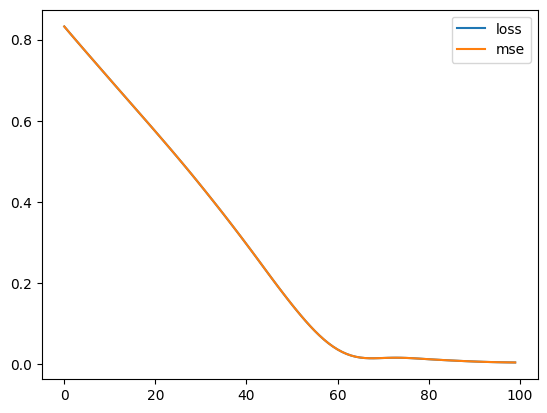

'Optimizer  = Adam'

In [13]:
pd.DataFrame( history.history).plot()
plt.show()

'''Optimizer  = Adam'''

In [14]:
# New smaple data for prediction 


''' If MSE > INT_MAX , use Scaling to transform the data '''
X1 = np.array([ 90 , 110 , 130 ])
mu = X1.mean() 
std_ = X1.std()

X1 = ( X1 - mu ) /  std_
X1 = X1.reshape( (1 , 3 , 1 ) )
X1

num = ts_model_bir.predict(X1 ) 
num = num*std_ + mu 
num
''' Adam Optimizer is certainly better than SGD for convergence to global min( since MSE loss function is CONVEX )'''

1/1 [==============================] - 0s 440ms/step


' Adam Optimizer is certainly better than SGD for convergence to global min( since MSE loss function is CONVEX )'

In [15]:
'''
Multivariate Tie Series Data - A data in 1 TS depends not ONLy on its past observation in own TS , but also past obdservatiosn in TS 

Multiple Input TS - The TS (clumns) are inter-dependent and used together for prediction of future value in 1 TS 
Multiple PArallel Series - the TS (columns) are INdependent , but can be  used together for preedcition in 1 TS , to help capture the LSTM mode
all differnt types of relation in TS and imple,emt  it together and save cost and time 

Multivariate - multple features for TS 
'''

'\nMultivariate Tie Series Data - A data in 1 TS depends not ONLy on its past observation in own TS , but also past obdservatiosn in TS \n\nMultiple Input TS - The TS (clumns) are inter-dependent and used together for prediction of future value in 1 TS \nMultiple PArallel Series - the TS (columns) are INdependent , but can be  used together for preedcition in 1 TS , to help capture the LSTM mode\nall differnt types of relation in TS and imple,emt  it together and save cost and time \n\nMultivariate - multple features for TS \n'

In [16]:
''' Multiple Input Time Series - all features(TS) are inter-dependent  '''

seq1 = np.array( [ 10 , 30 , 50 , 70 , 90 , 110])
seq2 = np.array( [100 , 120 , 140 , 160 , 180 , 200])
out_seq =  np.array ( np.add( seq1 , seq2 ) ) 

# Reshaoe it into proper train ing daatset ( 1 col , n_rows) and then stack all of them (horizonatlly)
''' Assume , the Out Seq  col is NOT a TS , so out seq data depends ONLY on , rest 2 ts (seq1 and seq2 ) '''

seq1 = seq1.reshape( (-1 , 1 ))
seq2 = seq2.reshape ( (-1 , 1))
out_seq = out_seq.reshape( (-1 , 1 ))
# stack them horizontally 
data = np.hstack( (seq1 , seq2 , out_seq))

# TS are 1 and 2 col - so use 3 timestapes( 3 rows of both TS togther) and the 3rd row correponding of last col(non TS ) as target var 


In [17]:

def inp_seq_2d( seq , t_steps ):
    X= [] 
    Y= []
    for i in range( len(seq) ):
        end_i = i + t_steps 

        if( end_i > len(seq)-1) :
            break
       # since seq is now a 2D array, so slicing rows and cols both 
        x, y = seq[i:end_i , :-1 ] , seq[end_i-1 , -1 ]
        X.append(x)
        Y.append(y)
    return np.array(X) , np.array(Y) 

X, y = inp_seq_2d( data , t_steps )


''' In each itr , we use continuous 3 rows of both TS together (iterdependent) to predict future TS data '''




' In each itr , we use continuous 3 rows of both TS together (iterdependent) to predict future TS data '

In [21]:
# make a Stacked LSTM Model (units- output dim( ht/  ct))

ts_model3 = keras.models.Sequential(
    [
        keras.layers.LSTM ( 50 , activation = "relu" , input_shape = (3 ,2 )) , # TS is multiavriate with 2 TS (= 2 features )
        keras.layers.Dense(1 )
    ]
)
ts_model3.compile( loss = "mse" , optimizer = "adam" , metrics= "mse")


In [22]:
history = ts_model3.fit (X , y  , epochs = 100 )

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 61646.8398 - mse: 61646.8398
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 60573.3320 - mse: 60573.3320
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 59630.8594 - mse: 59630.8594
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 58838.3242 - mse: 58838.3242
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 58176.3867 - mse: 58176.3867
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 57579.2383 - mse: 57579.2383
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 57007.9062 - mse: 57007.9062
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 56439.8008 - mse: 56439.8008
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 55864.3125 - mse: 55864.3125
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 55275.3008 - mse: 552

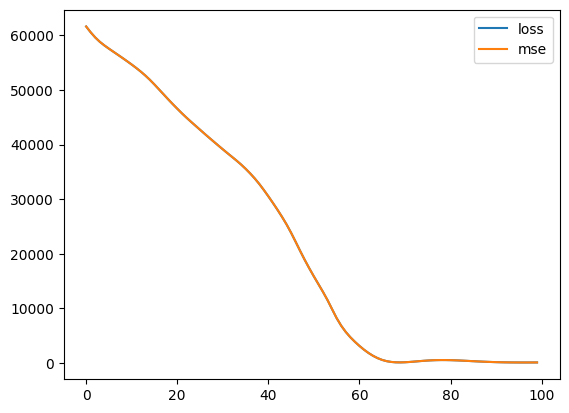

In [23]:
pd.DataFrame ( history.history).plot()
plt.show()

In [28]:
ts_model3.predict( X[:1])

1/1 [==============================] - 0s 374ms/step


array([[175.41505]], dtype=float32)

In [47]:
''' To split the data for multple output , the label should be at any timestep ,a vector of all TS at that tiems tep and X all 
timesteps before this y (label)'''


def inp_seq_2d_mul_out( seq , t_steps ):
    X= [] 
    Y= []
    for i in range( len(seq) ):
        end_i = i + t_steps 

        if( end_i > len(seq)-1) :
            break
       # since seq is now a 2D array, so slicing rows and cols both 
        x, y = seq[i:end_i , :-1 ] , seq[end_i-1 , :  ] # 
        ''' For label y , slice form start to end , for each row '''
        X.append(x)
        Y.append(y)
    return np.array(X) , np.array(Y) 




''' In each itr , we use continuous 3 rows of both TS together (iterdependent) to predict future TS data '''




' In each itr , we use continuous 3 rows of both TS together (iterdependent) to predict future TS data '

In [48]:
'''  Multiple Output Tiem Series  - INDEPENDENT TS '''
''' Multiple Input Time Series - all features(TS) are inter-dependent  '''

seq1 = np.array( [ 10 , 30 , 50 , 70 , 90 , 110])
seq2 = np.array( [1 , 12 , 9 , 13 , 40  , 20])
out_seq =  np.array ( np.add( seq1 , seq2 ) ) 

# Reshaoe it into proper train ing daatset ( 1 col , n_rows) and then stack all of them (horizonatlly)
''' Assume , the Out Seq  col is NOT a TS , so out seq data depends ONLY on , rest 2 ts (seq1 and seq2 ) '''

seq1 = seq1.reshape( (-1 , 1 ))
seq2 = seq2.reshape ( (-1 , 1))
out_seq = out_seq.reshape( (-1 , 1 ))
# stack them horizontally 
data = np.hstack( (seq1 , seq2 , out_seq))

# TS are 1 and 2 col - so use 3 timestapes( 3 rows of both TS togther) and the 3rd row correponding of last col(non TS ) as target var 

X2, y2 = inp_seq_2d_mul_out( data , t_steps )

In [69]:
# make a Stacked LSTM Model (units- output dim( ht/  ct))

# no of cols (TS)
n_features = 3 
'''  In Mullple Output TS , The Output is of dim same as No of COls ( so Dense layers shouls have no of col np of o/p neurons )'''

ts_model4 = keras.models.Sequential(
    [
        keras.layers.LSTM ( 50 , activation = "relu" , input_shape = (3 ,2 ) , return_sequences  =True ) ,
          # TS is multiavriate with 2 TS (= 2 features )

           keras.layers.LSTM ( 50 , activation = "relu" ,) ,
        keras.layers.Dense( n_features ) 
    ]
    
    # return sequences True for all layerse cept last layer 
)
ts_model4.compile( loss = "mse" , optimizer = "adam" , metrics= "mse")


In [70]:
ts_model4.fit( X2 , y2 , epochs = 150 )



Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 4912.7563 - mse: 4912.7563
Epoch 2/150
1/1 [==============================] - 0s 11ms/step - loss: 4875.2324 - mse: 4875.2324
Epoch 3/150
1/1 [==============================] - 0s 13ms/step - loss: 4835.5620 - mse: 4835.5620
Epoch 4/150
1/1 [==============================] - 0s 12ms/step - loss: 4792.9917 - mse: 4792.9917
Epoch 5/150
1/1 [==============================] - 0s 12ms/step - loss: 4746.9585 - mse: 4746.9585
Epoch 6/150
1/1 [==============================] - 0s 13ms/step - loss: 4695.3608 - mse: 4695.3608
Epoch 7/150
1/1 [==============================] - 0s 13ms/step - loss: 4637.9058 - mse: 4637.9058
Epoch 8/150
1/1 [==============================] - 0s 16ms/step - loss: 4575.0005 - mse: 4575.0005
Epoch 9/150
1/1 [==============================] - 0s 15ms/step - loss: 4505.8730 - mse: 4505.8730
Epoch 10/150
1/1 [==============================] - 0s 14ms/step - loss: 4430.0786 - mse: 4430.0786
Epoch 11/15

In [52]:
ts_model4.predict( X2[:1])

1/1 [==============================] - 0s 85ms/step


array([[50.183308,  8.301408, 58.640854]], dtype=float32)

In [53]:
y2[:1]

array([[50,  9, 59]])

In [74]:
''' For experimentation , PAper - https://github.com/zhiyongc/Stacked_Bidirectional_Unidirectional_LSTM'''
''' MUltiple Bidirectional LSTM stacked folowed by a uiderctioanl LSTM is beter , as wriyen in above paper '''


''' WORKING ON IT   :) '''

n_features = 3 

ts_model_bi_stack = keras.models.Sequential([
    
        keras.layers.Bidirectional(keras.layers.LSTM ( 50 , activation = "relu" , input_shape = (3 , 2  ) , return_sequences  =True ) ),
         keras.layers.Bidirectional(keras.layers.LSTM ( 50 , activation = "relu" , return_sequences  =True ) ),
        
          # TS is multiavriate with 2 TS (= 2 features )

           keras.layers.LSTM ( 50 , activation = "relu"  , return_sequences = False ) ,
        keras.layers.Dense( n_features ) 
    
    
    # return sequences True for all layerse cept last layer 
])
ts_model_bi_stack.compile( loss = "mse" , optimizer = "adam" , metrics= "mse")



In [76]:
# ts_model_bi_stack.fit( X2 , y2 , epochs = 200 )